In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Apr 23 03:02:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torchvision
from google.colab import drive
drive.mount('/content/drive')
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1.11.0+cu102
True
Tesla P100-PCIE-16GB


In [3]:
%cd '/content/drive/My Drive'
!git clone https://github.com/ultralytics/yolov5.git

/content/drive/My Drive
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
%cd '/content/drive/My Drive/yolov5'
!pip install -U -r requirements.txt

/content/drive/My Drive/yolov5


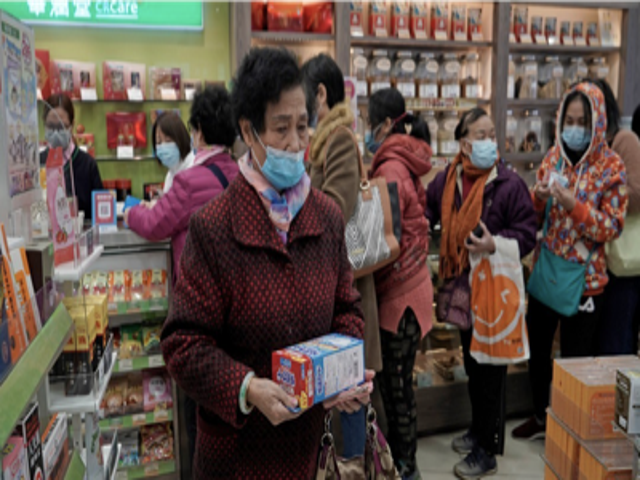

In [24]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
im = Image.open('/content/drive/MyDrive/files/mask_detection/images/maksssksksss737.png')
im=im.resize((640,480))
im


In [ ]:
anno="/content/drive/MyDrive/files/mask_detection/annotations/maksssksksss737.xml"
tree = ET.parse(anno)
for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                    print("width:"+str(width))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))    
                    print("height:"+str(height))

        if 'object' in elem.tag:
            for attr in list(elem):
                
                if 'name' in attr.tag:
                    name = attr.text                 
                    print("name:"+name)
                    
                            
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            xmin_edited=640/width*xmin
                            print("xmin:"+str(640/width*xmin))
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            ymin_edited=480/height*ymin
                            print("ymin:"+str(480/height*ymin))                                
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            xmax_edited=640/width*xmax
                            print("xmax:"+str(640/width*xmax))                                
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            ymax_edited=480/height*ymax
                            print("ymax:"+str(480/height*ymax))
            x_center = (xmin_edited + xmax_edited)/(2*im.width)
            y_center = (ymin_edited + ymax_edited)/(2*im.height)
            w = (xmax_edited - xmin_edited)/im.width
            h = (ymax_edited - ymin_edited)/im.height
            print("x_center:"+str(x_center))
            print("y_center:"+str(y_center))
            print("w:"+str(w))
            print("h:"+str(h))               


width:400
height:226
name:with_mask
xmin:44.800000000000004
ymin:116.81415929203541
xmax:73.60000000000001
ymax:150.79646017699116
x_center:0.0925
y_center:0.2787610619469027
w:0.045000000000000005
h:0.07079646017699114
name:with_mask
xmin:156.8
ymin:131.68141592920355
xmax:177.60000000000002
ymax:165.6637168141593
x_center:0.26125000000000004
y_center:0.3097345132743363
w:0.032500000000000015
h:0.07079646017699114
name:mask_weared_incorrect
xmin:254.4
ymin:106.19469026548674
xmax:308.8
ymax:191.1504424778761
x_center:0.44000000000000006
y_center:0.3097345132743363
w:0.085
h:0.17699115044247785
name:with_mask
xmin:468.8
ymin:125.30973451327435
xmax:500.8
ymax:169.91150442477877
x_center:0.7575000000000001
y_center:0.30752212389380534
w:0.05
h:0.09292035398230088
name:with_mask
xmin:563.2
ymin:108.31858407079648
xmax:595.2
ymax:152.9203539823009
x_center:0.905
y_center:0.27212389380530977
w:0.05
h:0.09292035398230088
name:with_mask
xmin:364.8
ymin:112.56637168141594
xmax:385.6
ymax:155.

In [ ]:
fileNames = [*os.listdir("/content/drive/MyDrive/files/mask_detection/images")]
print('There are {} images in the dataset'.format(len(fileNames)))

There are 853 images in the dataset


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fileNames, test_size=0.1, random_state=22)
test, val = train_test_split(test, test_size=0.7, random_state=22)
print("Length of Train =",len(train))
print("="*30)
print("Length of Valid =",len(val))
print("="*30)
print("Length of test =", len(test))
os.mkdir('./data/train')
os.mkdir('./data/val')
os.mkdir('./data/test')
os.mkdir('./data/train/images')
os.mkdir('./data/train/labels')
os.mkdir('./data/test/images')
os.mkdir('./data/test/labels')
os.mkdir('./data/val/images')
os.mkdir('./data/val/labels')

Length of Train = 767
Length of Valid = 61
Length of test = 25


In [ ]:
def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open("/content/drive/MyDrive/files/mask_detection/images/"+image)
        img1 = img.resize((640, 480))
        _ = img1.save("/content/drive/MyDrive/yolov5/data/"+folder_Name+"/images/"+image)
copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [ ]:
from xml.dom.minidom import parse
 
image_width = 640
image_height = 480
labels = {
            'with_mask': 0,
            'mask_weared_incorrect': 1,
            'without_mask': 2 
        }
def xml_parser(path):
    dom_tree = parse(path)
    root_node = dom_tree.documentElement
    size=root_node.getElementsByTagName('size')
    for obj in size:
        width=int(obj.getElementsByTagName('width')[0].childNodes[0].data)
        height=int(obj.getElementsByTagName('height')[0].childNodes[0].data)
    objects = root_node.getElementsByTagName('object')
    bboxes = []
    for obj in objects:
        label_name = obj.getElementsByTagName('name')[0].childNodes[0].data
        bndbox = obj.getElementsByTagName('bndbox')[0]
        xmin = int(bndbox.getElementsByTagName('xmin')[0].childNodes[0].data)
        ymin = int(bndbox.getElementsByTagName('ymin')[0].childNodes[0].data)
        xmax = int(bndbox.getElementsByTagName('xmax')[0].childNodes[0].data)
        ymax = int(bndbox.getElementsByTagName('ymax')[0].childNodes[0].data)
        xmin_edited=image_width/width*xmin
        ymin_edited=image_height/height*ymin
        xmax_edited=image_width/width*xmax
        ymax_edited=image_height/height*ymax
        x_center = (xmin_edited + xmax_edited)/(2*image_width)
        y_center = (ymin_edited + ymax_edited)/(2*image_height)
        w = (xmax_edited - xmin_edited)/image_width
        h = (ymax_edited - ymin_edited)/image_height
        box = [labels[label_name], x_center, y_center, w, h]
        bboxes.append(box)
    return bboxes


In [ ]:

import os
import shutil
data_path="/content/drive/MyDrive/files/mask_detection/annotations"
def prepare_data(imageList,folder_Name,data_path):
    save_path="/content/drive/MyDrive/yolov5/data/"+folder_Name
    num_xml = len(imageList)
    for i in range(num_xml):
        img_source_path = os.path.join(data_path, imageList[i])
        png_xml = imageList[i].split('.')[0] + '.xml'
        box_txt = xml_parser(os.path.join(data_path, png_xml))
        if len(box_txt) != 0:
            txt_path = os.path.join(save_path,  'labels', '%s.txt' % imageList[i][0:-4])
            with open(txt_path, 'w') as fw:
                for box in box_txt:
                    for data in box:
                        fw.write(str(data) + ' ')
                    fw.write('\n')
prepare_data(train,"train",data_path)   
prepare_data(test,"test",data_path)
prepare_data(val,"val",data_path)    


In [6]:
from IPython.display import Image, clear_output
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.1-142-g918d7b2 torch 1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.8/166.8 GB disk)


In [35]:
yaml_text = """train: data/train/images
val: data/val/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']"""

with open("data/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat data/data.yaml

train: data/train/images
val: data/val/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']

In [18]:
start = datetime.now()
!python train.py --epochs 50 --batch-size 32 --img 640 --data /content/drive/MyDrive/yolov5/data/data.yaml --cfg models/yolov5m.yaml --weights yolov5m.pt --name yolov5_results 
end = datetime.now()

train: weights=yolov5m.pt, cfg=models/yolov5m.yaml, data=/content/drive/MyDrive/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-142-g918d7b2 torch 1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw

In [19]:
print("Runtime =",end-start)

Runtime = 0:35:31.698519


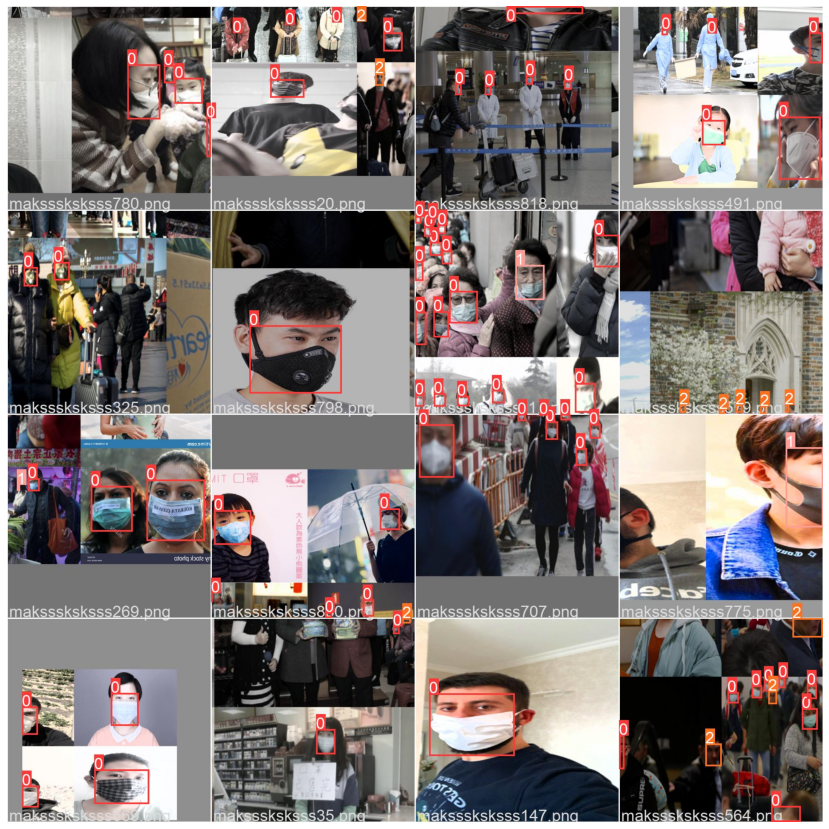

In [21]:
img = plt.imread('runs/train/yolov5_results2/train_batch0.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [36]:
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/yolov5_results2/weights/best.pt/ --data /content/drive/MyDrive/yolov5/data/data1.yaml --img 640 --half
# use test dataset to validate

val: data=/content/drive/MyDrive/yolov5/data/data1.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/yolov5_results2/weights/best.pt/'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-142-g918d7b2 torch 1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/data/test/labels' images and labels...25 found, 0 missing, 0 empty, 0 corrupt: 100% 25/25 [00:25<00:00,  1.00s/it]
val: New cache created: /content/drive/MyDrive/yolov5/data/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:01<00:00,  1.01s/it]
                 all         25        103    

In [44]:
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/yolov5_results2/weights/best.pt/ --data /content/drive/MyDrive/yolov5/data/data.yaml --img 640 --half
#use val dataset to validate

val: data=/content/drive/MyDrive/yolov5/data/data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/yolov5_results2/weights/best.pt/'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-142-g918d7b2 torch 1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/data/val/labels.cache' images and labels... 61 found, 0 missing, 0 empty, 0 corrupt: 100% 61/61 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:02<00:00,  1.21s/it]
                 all         61        311      0.915      0.905      0.959      0.685
           with_mask         61        

In [45]:

!python detect.py --source /content/drive/MyDrive/files/mask_detection/images/maksssksksss782.png/ --weights /content/drive/MyDrive/yolov5/runs/train/yolov5_results2/weights/best.pt --device 0 --save-txt --name mask_run


detect: weights=['/content/drive/MyDrive/yolov5/runs/train/yolov5_results2/weights/best.pt'], source=/content/drive/MyDrive/files/mask_detection/images/maksssksksss782.png/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=mask_run, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-142-g918d7b2 torch 1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
image 1/1 /content/drive/MyDrive/files/mask_detection/images/maksssksksss782.png: 384x640 2 with_masks, Done. (0.011s)
Speed: 0.5ms pre-process, 11.2ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/mask_run
1 labels save

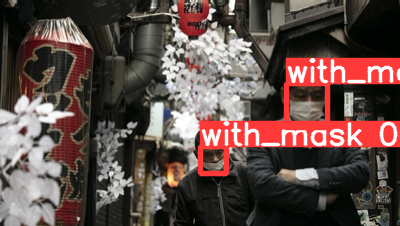

In [46]:
img=Image.open("/content/drive/MyDrive/yolov5/runs/detect/mask_run/maksssksksss782.png")
img
#we can see that mask_wear_incorrectly is incorrectly predicted as with_mask using an image in test dataset